<a href="https://colab.research.google.com/github/hafilmr/LearningCodeTrainee/blob/main/Time%20Series%20Basics/Box_Cox.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!wget -nc https://lazyprogrammer.me/course_files/airline_passengers.csv

--2022-02-02 03:22:39--  https://lazyprogrammer.me/course_files/airline_passengers.csv
Resolving lazyprogrammer.me (lazyprogrammer.me)... 172.67.213.166, 104.21.23.210, 2606:4700:3031::6815:17d2, ...
Connecting to lazyprogrammer.me (lazyprogrammer.me)|172.67.213.166|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 2036 (2.0K) [text/csv]
Saving to: ‘airline_passengers.csv’

airline_passengers. 100%[===================>]   1.99K  --.-KB/s    in 0s      

2022-02-02 03:22:39 (36.0 MB/s) - ‘airline_passengers.csv’ saved [2036/2036]



In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from scipy.stats import boxcox

In [ ]:
df = pd.read_csv('/content/airline_passengers.csv', index_col='Month', parse_dates=True)

In [ ]:
len(df)

144

In [ ]:
df.head()

,Passengers
Month,
1949-01-01,112
1949-02-01,118
1949-03-01,132
1949-04-01,129
1949-05-01,121


In [ ]:
# Lets change name of column, its too long

# df.rename(columns={'International airline passengers: monthly totals in thousands. Jan 49 ? Dec 60':'Passangers'}, inplace=True)

In [ ]:
df

,Passengers
Month,
1949-01-01,112
1949-02-01,118
1949-03-01,132
1949-04-01,129
1949-05-01,121
...,...
1960-08-01,606
1960-09-01,508
1960-10-01,461


In [ ]:
# drop last row, we dont need this
# df = df[:-1]

In [ ]:
# df

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 144 entries, 1949-01-01 to 1960-12-01
Data columns (total 1 columns):
 #   Column      Non-Null Count  Dtype
---  ------      --------------  -----
 0   Passengers  144 non-null    int64
dtypes: int64(1)
memory usage: 2.2 KB


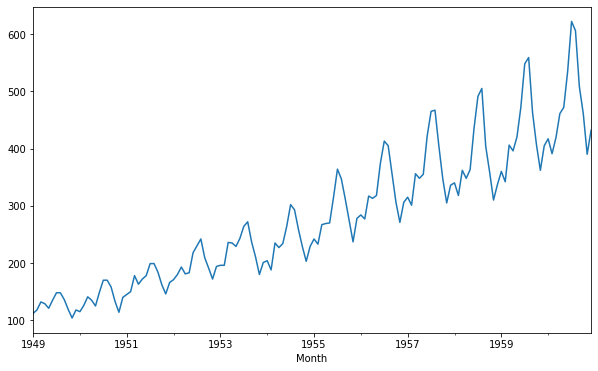

In [ ]:
df['Passengers'].plot(figsize=(10, 6));
# x = df['Month']
# plt.plot(x,y)
# plt.xticks(x, df['Month']);

Power Transform

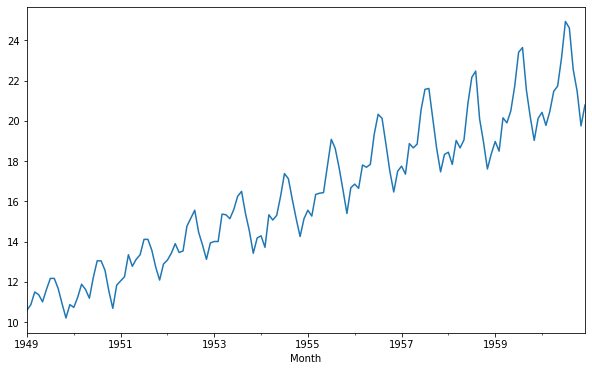

In [ ]:
df['SqrtPassangers'] = np.sqrt(df['Passengers'])
df['SqrtPassangers'].plot(figsize=(10, 6))

Log Transform

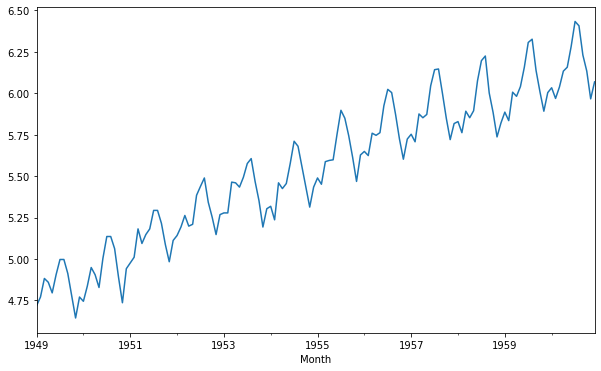

In [ ]:
df['LogPassangers'] = np.log(df['Passengers'])
df['LogPassangers'].plot(figsize=(10, 6))

Box-Cox Transform

In [ ]:
data, lam = boxcox(df['Passengers'])

In [ ]:
lam

0.14802265137037945

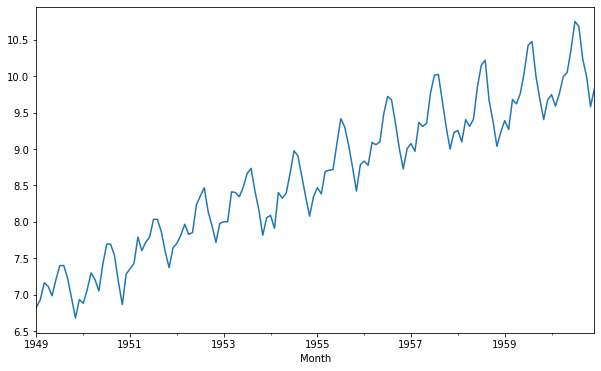

In [ ]:
df['BoxCoxPassangers'] = data
df['BoxCoxPassangers'].plot(figsize=(10, 6))

In [ ]:
# Check column BoxCoxPassengers
df['BoxCoxPassangers']

Month
1949-01-01     6.827490
1949-02-01     6.932822
1949-03-01     7.161892
1949-04-01     7.114611
1949-05-01     6.983787
                ...    
1960-08-01    10.684049
1960-09-01    10.234573
1960-10-01     9.992159
1960-11-01     9.582623
1960-12-01     9.831860
Name: BoxCoxPassangers, Length: 144, dtype: float64

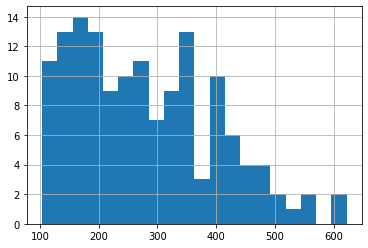

In [ ]:
df['Passengers'].hist(bins=20)

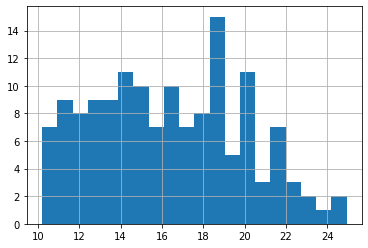

In [ ]:
df['SqrtPassangers'].hist(bins=20)

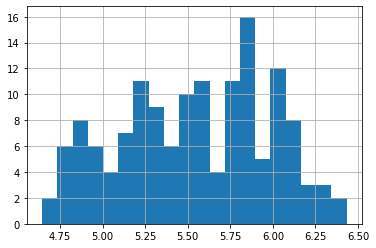

In [ ]:
df['LogPassangers'].hist(bins=20)

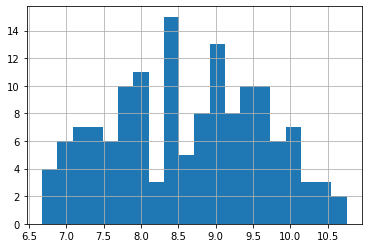

In [ ]:
df['BoxCoxPassangers'].hist(bins=20)

In [ ]:
# df['Month']= pd.to_datetime(df['Month'])

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 144 entries, 1949-01-01 to 1960-12-01
Data columns (total 4 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Passengers        144 non-null    int64  
 1   SqrtPassangers    144 non-null    float64
 2   LogPassangers     144 non-null    float64
 3   BoxCoxPassangers  144 non-null    float64
dtypes: float64(3), int64(1)
memory usage: 5.6 KB


In [ ]:
df.head()

,Passengers,SqrtPassangers,LogPassangers,BoxCoxPassangers
Month,,,,
1949-01-01,112,10.583005,4.718499,6.827490
1949-02-01,118,10.862780,4.770685,6.932822
1949-03-01,132,11.489125,4.882802,7.161892
1949-04-01,129,11.357817,4.859812,7.114611
1949-05-01,121,11.000000,4.795791,6.983787
